- MNIST Dataset
- Data Loader, Transformation
- Multilayer Neural Net, activation function
- Loss and Optimizer
- Training Loop (batch training)
- Model Evaluation
- GPU support

In [95]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [96]:
# device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [97]:
# hyper parameters
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 3
batch_size = 100
learning_rate = 0.001

In [98]:
# MNIST
train_dataset = torchvision.datasets.MNIST(root = "./data", train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root = "./data", train=False, transform=transforms.ToTensor())

print(train_dataset)
print(test_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [99]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

print(train_loader, len(train_loader)) # 600 * 100 = 60,000 images in training dataset
print(test_loader, len(test_loader)) # 100 * 100 = 10,000 images in testing dataset

<torch.utils.data.dataloader.DataLoader object at 0x000002319965AB70> 600
<torch.utils.data.dataloader.DataLoader object at 0x000002319A1A3320> 100


In [100]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape)
print(labels.shape)

torch.Size([100, 1, 28, 28])
torch.Size([100])


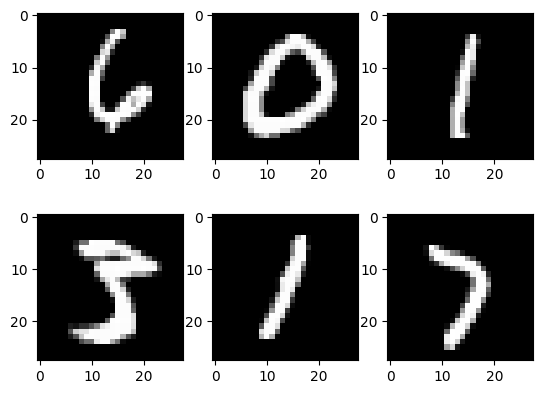

In [101]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap="gray")
plt.show()

In [102]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no softmax as we use cross entropy loss
        return out

In [103]:
model = NeuralNet(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)
model = model.to(device)

In [104]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [105]:
# training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100 x 1 x 28 x 28
        # 100 x 784
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1)%100 == 0:
            print(f"epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}")
    print("")

epoch 1 / 3, step 100/600, loss = 0.4849
epoch 1 / 3, step 200/600, loss = 0.2757
epoch 1 / 3, step 300/600, loss = 0.2846
epoch 1 / 3, step 400/600, loss = 0.1837
epoch 1 / 3, step 500/600, loss = 0.2088
epoch 1 / 3, step 600/600, loss = 0.1947

epoch 2 / 3, step 100/600, loss = 0.1332
epoch 2 / 3, step 200/600, loss = 0.2523
epoch 2 / 3, step 300/600, loss = 0.1697
epoch 2 / 3, step 400/600, loss = 0.3523
epoch 2 / 3, step 500/600, loss = 0.1204
epoch 2 / 3, step 600/600, loss = 0.0742

epoch 3 / 3, step 100/600, loss = 0.0858
epoch 3 / 3, step 200/600, loss = 0.2406
epoch 3 / 3, step 300/600, loss = 0.1033
epoch 3 / 3, step 400/600, loss = 0.0435
epoch 3 / 3, step 500/600, loss = 0.1417
epoch 3 / 3, step 600/600, loss = 0.1159



In [106]:
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)

        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    
    acc = 100.0 * n_correct / n_samples
    print(f"accuracy = {acc}")

accuracy = 96.39
